## Fit distributions on Tests Data

In [1]:
## Import libraries
import os
import gzip
import json
import datetime
import itertools
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

## Import dataframe

In [2]:
passing_train = pd.read_csv('../data/processed/passing_train.csv')
failing_train = pd.read_csv('../data/processed/failing_train.csv')

In [3]:
passing_train.head()

,Unnamed: 0,created_at,updated_at,run_id,status,conclusion,run_duration,test_id
0,12,2022-12-14T15:46:53Z,2022-12-14T15:47:14Z,3696409364,completed,success,21.0,28698040
1,19,2022-10-18T22:05:12Z,2022-10-18T22:05:39Z,3277249376,completed,success,27.0,28698040
2,25,2022-10-13T17:49:42Z,2022-10-13T17:50:28Z,3244532523,completed,success,46.0,28698040
3,5,2022-07-12T21:11:13Z,2022-07-12T21:11:42Z,2659424327,completed,success,29.0,28698040
4,22,2022-07-05T15:28:26Z,2022-07-05T15:29:06Z,2617219129,completed,success,40.0,28698040


In [4]:
failing_train.head()

,Unnamed: 0,created_at,updated_at,run_id,status,conclusion,run_duration,test_id
0,20,2022-10-10T15:46:57Z,2022-10-10T15:47:54Z,3220628244,completed,failure,57.0,28698040
1,9,2022-09-01T22:31:42Z,2022-09-01T22:32:36Z,2975376600,completed,failure,54.0,28698040
2,29,2023-01-12T18:04:21Z,2023-01-12T18:04:59Z,3904825511,completed,failure,38.0,28698040
3,29,2022-12-01T18:58:49Z,2022-12-01T18:59:25Z,3595655421,completed,failure,36.0,28698040
4,27,2022-10-07T17:50:17Z,2022-10-07T17:51:07Z,3206656422,completed,failure,50.0,28698040


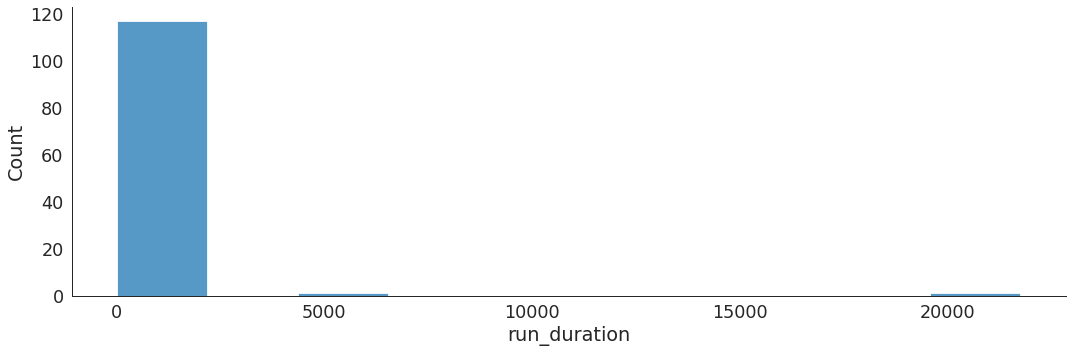

In [5]:
# Distribution of values of run duration
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=failing_train, x="run_duration", kind="hist", bins = 10, aspect = 3)

In [6]:
# Since the data here is heavily skewed, hence implementing 
# log transformation here.
failing_train.run_duration = np.log(failing_train.run_duration)

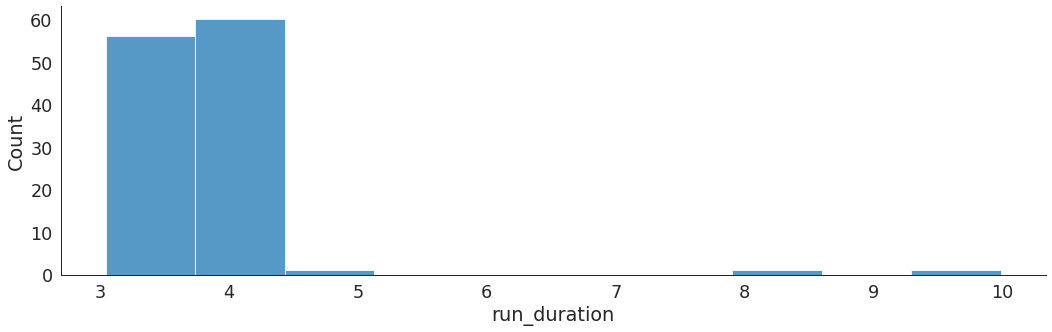

In [7]:
# Distribution of values of failing run duration
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=failing_train, x="run_duration", kind="hist", bins = 10, aspect = 3)

In [8]:
# create a separate set of values for failing durations
fail_run_duration = failing_train.run_duration.values

Fitting 110 distributions:  75%|███████▌  | 83/110 [00:13<00:04,  5.88it/s]SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitting 110 distributions: 100%|██████████| 110/110 [00:55<00:00,  1.98it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
tukeylambda,0.002575,inf,-1263.838645,0.026234,0.178301,0.000882
levy_stable,0.005742,487.864155,-1163.637688,inf,0.123998,0.047126
semicircular,0.009851,inf,-1108.959689,0.026010,0.107664,0.117684
rdist,0.010874,inf,-1092.423379,0.026388,0.201873,0.000100
logistic,0.013565,201.700105,-1070.885686,inf,0.111320,0.096973


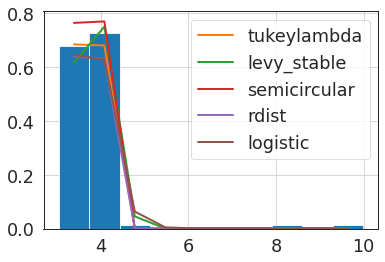

In [9]:
f = Fitter(fail_run_duration,
           distributions=get_distributions(), bins =10)
f.fit()
f.summary()

In [10]:
# Find best failing distribution
best_failing_dist = f.get_best(method="sumsquare_error")
best_failing_dist

{'tukeylambda': {'lam': 1.3621483701266333,
  'loc': 3.7552152783749952,
  'scale': 0.9680690945551738}}

Fitting 1 distributions: 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
tukeylambda,0.002575,inf,-1263.838645,0.026234,0.178301,0.000882


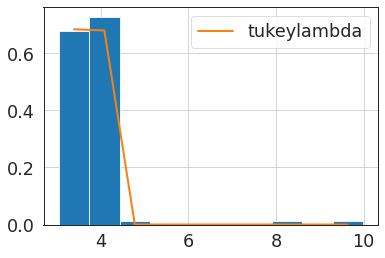

In [11]:
f = Fitter(fail_run_duration,
           distributions=best_failing_dist, bins =10)
f.fit()
f.summary()

In [12]:
f_dist = list(best_failing_dist.keys())[0]

In [13]:
# Calculate the parameters for the failing distribution curve
f_params = f.fitted_param[f_dist]
f_params

(1.3621483701266333, 3.7552152783749952, 0.9680690945551738)

In [14]:
# create a separate set of values for the passing run times.
pass_run_duration = passing_train.run_duration.values
pass_run_duration

array([21., 27., 46., 29., 40., 48., 38., 35., 29., 30., 28., 23., 28.,
       54., 34., 34., 41., 43., 29., 31., 53., 33., 28., 30., 39., 22.,
       36., 28., 67., 41., 42., 31., 24., 29., 37., 22., 24., 38., 64.,
       55., 28., 23., 28., 42., 34., 74., 49., 37., 51., 41., 29., 21.,
       22., 32., 42., 21., 33., 39., 38., 67., 27., 34., 21., 34., 39.,
       39., 40., 61., 33., 34., 30., 43., 59., 34., 36., 38., 41., 40.,
       42., 23., 33., 30., 29., 25., 33., 36., 34., 24., 55., 23., 37.,
       32., 22., 39., 62., 27.])

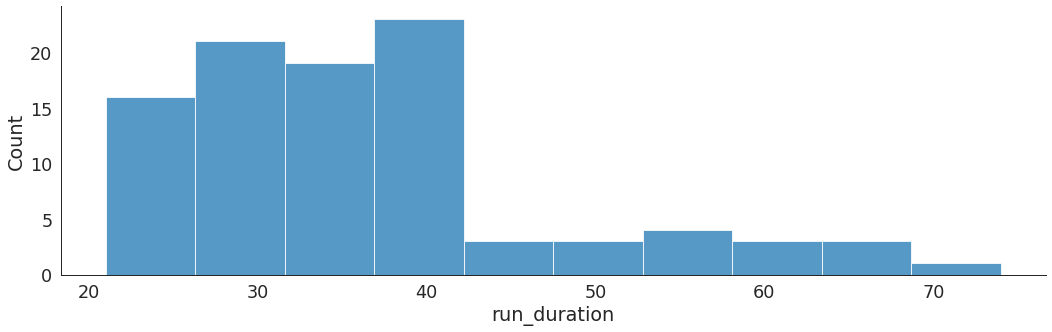

In [15]:
# Distribution of values of passing run duration
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=passing_train, x="run_duration", kind="hist", bins = 10, aspect = 3)

Fitting 110 distributions: 100%|██████████| 110/110 [01:34<00:00,  1.16it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
ncf,0.000500,101.323887,-1144.990283,0.094049,0.068344,0.734795
betaprime,0.000500,99.457792,-1149.530667,0.095022,0.067572,0.747187
genlogistic,0.000502,97.940687,-1153.772166,0.096430,0.062110,0.830219
alpha,0.000502,97.441109,-1153.749685,0.084024,0.061447,0.839552
gumbel_r,0.000503,95.900055,-1158.160557,0.096619,0.062781,0.820578


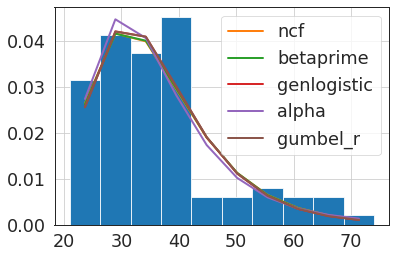

In [16]:
p = Fitter(pass_run_duration,
           distributions=get_distributions(), bins =10)
p.fit()
p.summary()

In [17]:
# find the best passing distribution
best_passing_dist = p.get_best(method="sumsquare_error")
best_passing_dist

{'ncf': {'dfn': 454.8847888383016,
  'dfd': 26.747019382412518,
  'nc': 0.0009900107446784052,
  'loc': -0.8489346701112037,
  'scale': 34.20614799755116}}

Fitting 1 distributions: 100%|██████████| 1/1 [00:05<00:00,  5.65s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
ncf,0.0005,101.323887,-1144.990283,0.094049,0.068344,0.734795


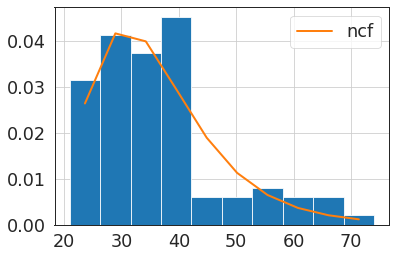

In [18]:
p = Fitter(pass_run_duration,
           distributions=best_passing_dist, bins =10)
p.fit()
p.summary()

In [19]:
p_dist = list(best_passing_dist.keys())[0]

In [20]:
# Calculate the parameters for the passing distribution curve
p_params = p.fitted_param[p_dist]
p_params

(454.8847888383016,
 26.747019382412518,
 0.0009900107446784052,
 -0.8489346701112037,
 34.20614799755116)

## Caluculate the OSP 

In [21]:
x_passing = np.linspace(pass_run_duration.min(), pass_run_duration.max(), num = len(pass_run_duration))
x_passing

array([21.        , 21.55789474, 22.11578947, 22.67368421, 23.23157895,
       23.78947368, 24.34736842, 24.90526316, 25.46315789, 26.02105263,
       26.57894737, 27.13684211, 27.69473684, 28.25263158, 28.81052632,
       29.36842105, 29.92631579, 30.48421053, 31.04210526, 31.6       ,
       32.15789474, 32.71578947, 33.27368421, 33.83157895, 34.38947368,
       34.94736842, 35.50526316, 36.06315789, 36.62105263, 37.17894737,
       37.73684211, 38.29473684, 38.85263158, 39.41052632, 39.96842105,
       40.52631579, 41.08421053, 41.64210526, 42.2       , 42.75789474,
       43.31578947, 43.87368421, 44.43157895, 44.98947368, 45.54736842,
       46.10526316, 46.66315789, 47.22105263, 47.77894737, 48.33684211,
       48.89473684, 49.45263158, 50.01052632, 50.56842105, 51.12631579,
       51.68421053, 52.24210526, 52.8       , 53.35789474, 53.91578947,
       54.47368421, 55.03157895, 55.58947368, 56.14736842, 56.70526316,
       57.26315789, 57.82105263, 58.37894737, 58.93684211, 59.49

In [22]:
x_failing = np.linspace(fail_run_duration.min(), fail_run_duration.max(), num = len(fail_run_duration))
x_failing

array([3.04452244, 3.10336051, 3.16219858, 3.22103666, 3.27987473,
       3.3387128 , 3.39755087, 3.45638895, 3.51522702, 3.57406509,
       3.63290316, 3.69174124, 3.75057931, 3.80941738, 3.86825546,
       3.92709353, 3.9859316 , 4.04476967, 4.10360775, 4.16244582,
       4.22128389, 4.28012196, 4.33896004, 4.39779811, 4.45663618,
       4.51547425, 4.57431233, 4.6331504 , 4.69198847, 4.75082655,
       4.80966462, 4.86850269, 4.92734076, 4.98617884, 5.04501691,
       5.10385498, 5.16269305, 5.22153113, 5.2803692 , 5.33920727,
       5.39804534, 5.45688342, 5.51572149, 5.57455956, 5.63339764,
       5.69223571, 5.75107378, 5.80991185, 5.86874993, 5.927588  ,
       5.98642607, 6.04526414, 6.10410222, 6.16294029, 6.22177836,
       6.28061643, 6.33945451, 6.39829258, 6.45713065, 6.51596873,
       6.5748068 , 6.63364487, 6.69248294, 6.75132102, 6.81015909,
       6.86899716, 6.92783523, 6.98667331, 7.04551138, 7.10434945,
       7.16318752, 7.2220256 , 7.28086367, 7.33970174, 7.39853

In [23]:
f_params_list = list(best_failing_dist.values())[0]

In [24]:
failing_distribution_object = getattr(scipy.stats, f_dist)

In [25]:
best_f_fit_distribution = failing_distribution_object(**f_params_list)

In [26]:
passing_distribution_object = getattr(scipy.stats, p_dist)

In [27]:
p_param_list = list(best_passing_dist.values())[0]

In [28]:
best_p_fit_distribution = passing_distribution_object(**p_param_list)

In [29]:
std_failing =  np.std(fail_run_duration)
x_std_failing = (x_failing - np.mean(fail_run_duration)) / std_failing
std_passing = np.std(pass_run_duration)
x_std_passing = (x_passing - np.mean(pass_run_duration)) / std_passing

In [30]:
y1 = best_f_fit_distribution.pdf(fail_run_duration)
y2 = best_p_fit_distribution.pdf(pass_run_duration)

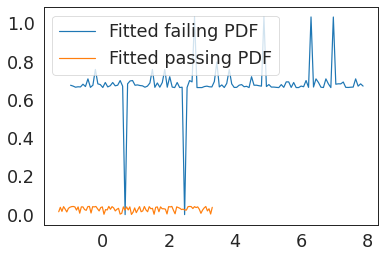

In [31]:
plt.plot(x_std_failing, y1, label='Fitted failing PDF')
plt.plot(x_std_passing, y2, label='Fitted passing PDF')
plt.legend()
plt.show()

In [32]:
from intersect import intersection
# Obtain the intersection points between the distribution curves
x, y = intersection(x_std_failing,y1,x_std_passing,y2)

In [33]:
osp = max(x)
osp

2.4786435764723356